<a href="https://colab.research.google.com/github/granja17/FootballPredict/blob/main/Projeto_IACH_parte_03_previs%C3%A3o_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib as mlp
import os
import warnings
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
nome_do_arquivo = '/content/Big 5 2010 - 2020 - att.csv'

df = pd.read_csv(nome_do_arquivo, sep=';')
filtro = (df['Movement'] == 'in')
df = df.loc[filtro]

pd.to_numeric(df.Fee)
pd.to_numeric(df.Age)
df['Is Loan'] = df['Is Loan'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Fee'].fillna(0, inplace=True)  # Substitui NaN por 0
df['Fee'] = df['Fee'].astype(int)
df['Season'] = pd.to_datetime(df['Season'], format='%Y')
df['Season'] = df['Season'].dt.strftime('%Y')
df.info('Age')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11945 entries, 0 to 36539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Club             11945 non-null  object
 1   Player           11945 non-null  object
 2   Age              11945 non-null  int64 
 3   Nationality      11945 non-null  object
 4   Position         11945 non-null  object
 5   Short Position   11945 non-null  object
 6   Market Value     11945 non-null  int64 
 7   Dealing Club     11945 non-null  object
 8   Dealing Country  11689 non-null  object
 9   Fee              11945 non-null  int64 
 10  Movement         11945 non-null  object
 11  Window           11945 non-null  object
 12  League           11945 non-null  object
 13  Season           11945 non-null  object
 14  Is Loan          11945 non-null  object
 15  Loan Status      296 non-null    object
dtypes: int64(3), object(13)
memory usage: 1.5+ MB


,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Season,Is Loan,Loan Status
0,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,2017,False,NaN
3,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,2018,False,NaN
5,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,2017,False,NaN
6,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,2017,False,NaN
8,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,2019,False,NaN


In [3]:
df.set_index('Season', drop=True, inplace=True)
df.head()

,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Is Loan,Loan Status
Season,,,,,,,,,,,,,,,
2017,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,False,NaN
2018,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,False,NaN
2017,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,False,NaN
2017,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,False,NaN
2019,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,False,NaN


In [4]:
gastos_por_liga = df.groupby(['League', 'Season'])['Fee'].sum().reset_index()
gastos_por_liga['Season'] = gastos_por_liga['Season'].astype(int)
gastos_por_liga.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   League  55 non-null     object
 1   Season  55 non-null     int64 
 2   Fee     55 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


# Adicionando dados de 2021 no df gastos_por_liga

In [5]:
# Dados referentes a 2021
dados_2021 = {'League': ['1 Bundesliga', 'Laliga', 'Ligue 1', 'Premier League', 'Serie A'],
              'Season': ['2021', '2021', '2021', '2021', '2021'],
              'Fee': [512288635, 389707000, 480760000, 1708415800, 845607363]}

# DataFrame com os dados de 2021
df_2021 = pd.DataFrame(dados_2021)

# Adicionando os dados de 2021 ao DataFrame original
gastos_por_liga = pd.concat([gastos_por_liga, df_2021], ignore_index=True)


gastos_por_liga.reset_index(drop=True, inplace=True)
gastos_por_liga['Season'] = gastos_por_liga['Season'].astype(int)
gastos_por_liga.info()
# DataFrame resultante
gastos_por_liga.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   League  60 non-null     object
 1   Season  60 non-null     int64 
 2   Fee     60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   League  60 non-null     object
 1   Season  60 non-null     int64 
 2   Fee     60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


# Realização do Modelo de Regressão Linear:
## Previsão de 2021 baseado em dados de 2010 a 2020

In [6]:
gastos_por_liga['Season'] = pd.to_numeric(gastos_por_liga['Season'], errors='coerce')

# dados até 2020
filtro = gastos_por_liga['Season'] <= 2020
dados_ate_2020 = gastos_por_liga[filtro]

previsoes_df2 = pd.DataFrame(columns=['League', 'Fee'])

# lista única de ligas
ligas = dados_ate_2020['League'].unique()

# modelo de regressão linear para cada liga
for liga in ligas:
    dados_liga = dados_ate_2020[dados_ate_2020['League'] == liga]

    X = dados_liga['Season'].values.reshape(-1, 1)
    y = dados_liga['Fee'].values

    model = LinearRegression()
    model.fit(X, y)

    # gastos para 2021 - previsão
    previsao_2021 = model.predict([[2021]])[0]

    # Somando os resultados ao DataFrame de previsões
    previsoes_df2 = previsoes_df2.append({'League': liga, 'Fee': previsao_2021.astype(int)}, ignore_index=True)

# previsões

previsoes_df2['Season'] = 2021
previsoes_df2['Season'] = previsoes_df2['Season'].astype(int)

previsoes_df2



,League,Fee,Season
0,1 Bundesliga,786559345,2021
1,Laliga,1086101800,2021
2,Ligue 1,771781272,2021
3,Premier League,2110573890,2021
4,Serie A,1280174624,2021


# Criação de dados_completos que é o resultado dos dados reais de 2010 a 2020 concatenados a previsão 2021

In [7]:
# Concatenando os DataFrames
dados_completos2 = pd.concat([dados_ate_2020, previsoes_df2])
dados_completos2 = dados_completos2.reset_index()

# dados completos
dados_completos2.sort_values(by='Season')

dados_completos2.drop('index', axis=1, inplace=True)
dados_completos2['Fee'] = dados_completos2['Fee'].astype(int)
dados_completos2

,League,Season,Fee
0,1 Bundesliga,2010,213440000
1,1 Bundesliga,2011,218420000
2,1 Bundesliga,2012,291110000
3,1 Bundesliga,2013,305400000
4,1 Bundesliga,2014,368275000
5,1 Bundesliga,2015,475900000
6,1 Bundesliga,2016,707628000
7,1 Bundesliga,2017,723190000
8,1 Bundesliga,2018,568050000
9,1 Bundesliga,2019,942240000


#Gráfico de dados até 2020 + previsão 2021

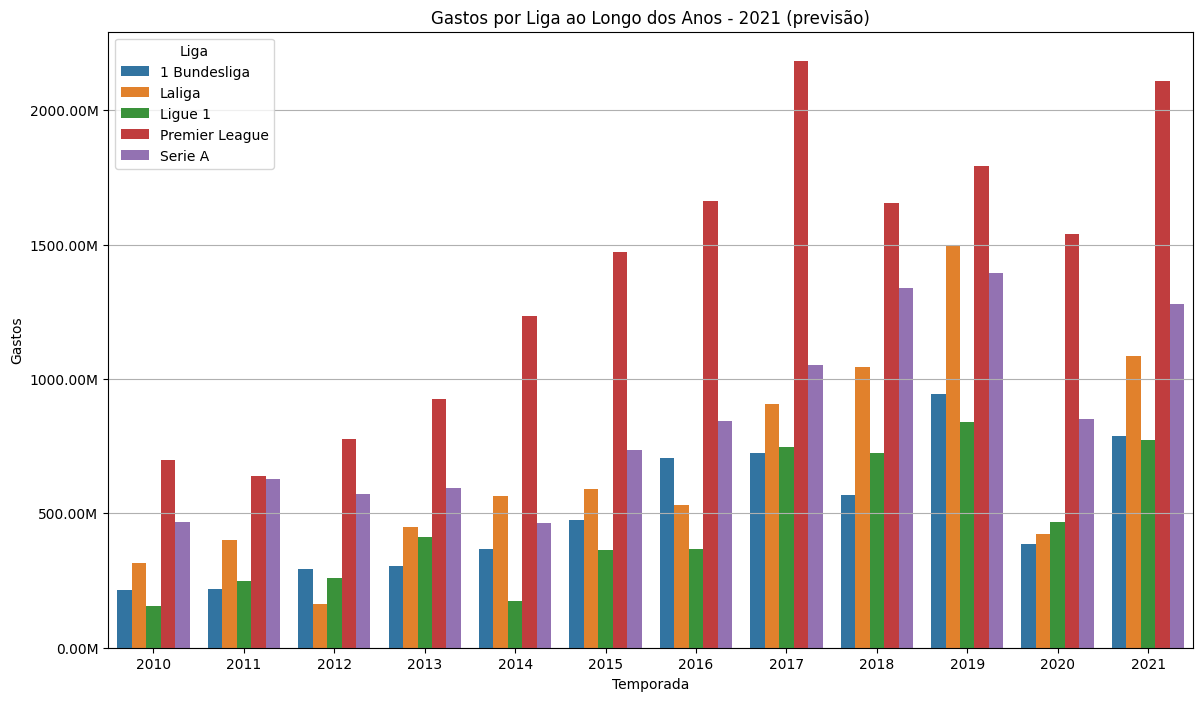

In [8]:
# gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='Season', y='Fee', hue='League', data=dados_completos2, ci=None)


plt.title('Gastos por Liga ao Longo dos Anos - 2021 (previsão)')
plt.xlabel('Temporada')
plt.ylabel('Gastos')
plt.legend(title='Liga')

# eixo y em milhões
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis='y')

plt.show()


# Gráfico Previsão 2021 x Realidade 2021

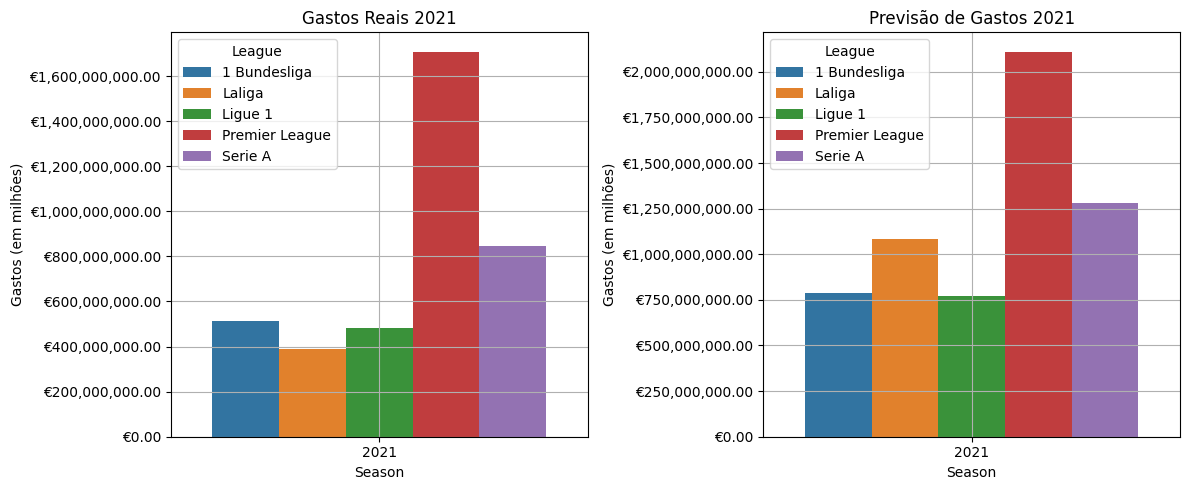

In [9]:
# apenas os dados de 2021
previsao_2021 = dados_completos2[dados_completos2['Season'] == 2021]

# apenas os dados de 2021
gastos_2021 = gastos_por_liga.reset_index()
gastos_2021 = gastos_2021[gastos_2021['Season'] == 2021]


dados1 = gastos_2021
dados2 = previsao_2021

df1 = pd.DataFrame(dados1)
df2 = pd.DataFrame(dados2)

# subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
palette = sns.color_palette('Set2')

# primeiro gráfico
sns.barplot(x='Season', y='Fee', hue='League', data=gastos_2021, ax=axes[0])
axes[0].set_title('Gastos Reais 2021')
axes[0].set_ylabel('Gastos (em milhões)')
axes[0].yaxis.set_major_formatter('€{:,.2f}'.format)
axes[0].grid(True)

# segundo gráfico
sns.barplot(x='Season', y='Fee', hue='League', data=previsao_2021, ax=axes[1])
axes[1].set_title('Previsão de Gastos 2021')
axes[1].set_ylabel('Gastos (em milhões)')
axes[1].yaxis.set_major_formatter('€{:,.2f}'.format)
axes[1].grid(True)

# Ajustando layout
plt.tight_layout()

# gráficos
plt.show()



In [10]:
gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']

# MAE (Mean Absolute Error)
mae = mean_absolute_error(gastos_reais, previsao_gastos)
print(f'MAE: {mae:.2f}')

# MSE (Mean Squared Error)
mse = mean_squared_error(gastos_reais, previsao_gastos)
print(f'MSE: {mse:.2f}')

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')


MAE: 419682426.60
MSE: 199092670854586464.00
RMSE: 446198017.54


In [11]:
scaler = MinMaxScaler()

# Normalizando com scaler
gastos_reais_norm = scaler.fit_transform(gastos_reais.values.reshape(-1, 1))
previsao_gastos_norm = scaler.transform(previsao_gastos.values.reshape(-1, 1))

# Cálculo das métricas de erro
mae_norm = mean_absolute_error(gastos_reais_norm, previsao_gastos_norm)
mse_norm = mean_squared_error(gastos_reais_norm, previsao_gastos_norm)
rmse_norm = np.sqrt(mse_norm)

print(f'Normalized MAE: {mae_norm:.2f}')
print(f'Normalized MSE: {mse_norm:.2f}')
print(f'Normalized RMSE: {rmse_norm:.2f}')


Normalized MAE: 0.32
Normalized MSE: 0.11
Normalized RMSE: 0.34


# MAE, RMSE e MSE por Liga

In [12]:
gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']


resultados_por_league = pd.DataFrame(columns=['League', 'MAE', 'MSE', 'RMSE'])

# lista única de ligas
ligas = dados1['League'].unique()

# métricas para cada liga
for liga in ligas:
    # dados para a liga específica
    dados_liga_real = gastos_reais[dados1['League'] == liga]
    dados_liga_previsto = previsao_gastos[dados2['League'] == liga]

    # métricas para a liga
    mae_liga = mean_absolute_error(dados_liga_real, dados_liga_previsto)
    mse_liga = mean_squared_error(dados_liga_real, dados_liga_previsto)
    rmse_liga = np.sqrt(mse_liga)

    # resultados em DataFrame
    resultados_por_league = resultados_por_league.append({
        'League': liga,
        'MAE': mae_liga,
        'MSE': mse_liga,
        'RMSE': rmse_liga
    }, ignore_index=True)

# resultados
print(resultados_por_league)



           League          MAE           MSE         RMSE
0    1 Bundesliga  274270710.0  7.522442e+16  274270710.0
1          Laliga  696394800.0  4.849657e+17  696394800.0
2         Ligue 1  291021272.0  8.469338e+16  291021272.0
3  Premier League  402158090.0  1.617311e+17  402158090.0
4         Serie A  434567261.0  1.888487e+17  434567261.0


In [13]:
dados1.League

55      1 Bundesliga
56            Laliga
57           Ligue 1
58    Premier League
59           Serie A
Name: League, dtype: object

In [14]:
gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']

# Normalizando os valores de 'Fee'
scaler = MinMaxScaler()
gastos_reais_norm = scaler.fit_transform(gastos_reais.values.reshape(-1, 1))
previsao_gastos_norm = scaler.transform(previsao_gastos.values.reshape(-1, 1))

resultados_por_league = pd.DataFrame(columns=['League', 'MAE', 'MSE', 'RMSE'])

# lista única de ligas
ligas = dados1['League'].unique()

# métricas para cada liga
for liga in ligas:
    # dados para a liga específica
    dados_liga_real = gastos_reais_norm[dados1['League'] == liga]
    dados_liga_previsto = previsao_gastos_norm[dados2['League'] == liga]

    # Cálculo das métricas para a liga
    mae_liga = mean_absolute_error(dados_liga_real, dados_liga_previsto)
    mse_liga = mean_squared_error(dados_liga_real, dados_liga_previsto)
    rmse_liga = np.sqrt(mse_liga)

    # resultados no DataFrame
    resultados_por_league = resultados_por_league.append({
        'League': liga,
        'MAE': mae_liga,
        'MSE': mse_liga,
        'RMSE': rmse_liga
    }, ignore_index=True)

# resultados
print(resultados_por_league)



           League       MAE       MSE      RMSE
0    1 Bundesliga  0.207984  0.043257  0.207984
1          Laliga  0.528088  0.278877  0.528088
2         Ligue 1  0.220687  0.048703  0.220687
3  Premier League  0.304964  0.093003  0.304964
4         Serie A  0.329540  0.108597  0.329540


#TT 40/60

In [15]:
gastos_por_liga=gastos_por_liga.reset_index()

In [16]:
gastos_por_liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   60 non-null     int64 
 1   League  60 non-null     object
 2   Season  60 non-null     int64 
 3   Fee     60 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [17]:
# treino (até 2020) e teste (2021) para cada liga
leagues = gastos_por_liga['League'].unique()

# resultados por liga
results_list1 = []

for league in leagues:
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados de treino (até 2020) e teste (2021)
    train_data = league_data[league_data['Season'] <= 2020]
    test_data = league_data[league_data['Season'] == 2021]

    # features e alvo
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # conjuntos de treino e teste
    # Divisão 60/40
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

    # modelo de regressão linear
    model = LinearRegression()

    # modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de teste
    predictions = model.predict(X_test).astype(int)

    # resultados para a Liga
    results = pd.DataFrame({'Real': y_test, 'Previsto': predictions, 'Diferença': y_test - predictions})
    results_list1.append(results)

    print(f'Resultados para a Liga {league}:')
    print(results)
    print("\n")

Resultados para a Liga 1 Bundesliga:
         Real   Previsto  Diferença
55  512288635  922150210 -409861575


Resultados para a Liga Laliga:
         Real    Previsto  Diferença
56  389707000  1191255229 -801548229


Resultados para a Liga Ligue 1:
         Real   Previsto  Diferença
57  480760000  889226004 -408466004


Resultados para a Liga Premier League:
          Real    Previsto  Diferença
58  1708415800  2574956076 -866540276


Resultados para a Liga Serie A:
         Real    Previsto  Diferença
59  845607363  1460705692 -615098329




#TT 20/80 - com MSE, MAE e RMSE

In [18]:
# métricas por liga
mse_list = []
mae_list = []
rmse_list = []

# resultados por liga
results_list = []

# dados de treino (até 2020) e teste (2021) para cada liga
leagues = gastos_por_liga['League'].unique()

for league in leagues:
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados de treino (até 2020) e teste (2021)
    train_data = league_data[league_data['Season'] <= 2020]
    test_data = league_data[league_data['Season'] == 2021]

    # features e alvo
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # dados em conjuntos de treino e teste
    # Divisão 80/20
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # modelo de regressão linear
    model = LinearRegression()

    # modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de teste
    predictions = model.predict(X_test).astype(int)

    # Cálculo das métricas
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # métricas na lista
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)

    # resultados no DataFrame results_list
    results = pd.DataFrame({'Real': y_test.values, 'Previsto': predictions, 'Diferenca': y_test.values - predictions})
    results_list.append(results)

    # resultados para a Liga
    print(f'Resultados para a Liga {league}:')
    print(results)
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}\n')

# resultados para todas as ligas
all_results = pd.concat(results_list)

# métricas médias para todas as ligas
print("Médias das Métricas para Todas as Ligas:")
print(f'Média MSE: {np.mean(mse_list)}')
print(f'Média MAE: {np.mean(mae_list)}')
print(f'Média RMSE: {np.mean(rmse_list)}')

# diferenças entre Real e Previsto
print("\nResultados com Diferenças:")
all_results["League"] = "1 Bundesliga", "Laliga", "Ligue 1", "Premier League", "Serie A"
all_results


Resultados para a Liga 1 Bundesliga:
        Real   Previsto  Diferenca
0  512288635  668373738 -156085103
MSE: 2.436255937852061e+16
MAE: 156085103.0
RMSE: 156085103.0

Resultados para a Liga Laliga:
        Real   Previsto  Diferenca
0  389707000  856032626 -466325626
MSE: 2.1745958946429187e+17
MAE: 466325626.0
RMSE: 466325626.0

Resultados para a Liga Ligue 1:
        Real   Previsto  Diferenca
0  480760000  698308284 -217548284
MSE: 4.732725587134466e+16
MAE: 217548284.0
RMSE: 217548284.0

Resultados para a Liga Premier League:
         Real    Previsto  Diferenca
0  1708415800  2127570667 -419154867
MSE: 1.7569080252978768e+17
MAE: 419154867.0
RMSE: 419154867.0

Resultados para a Liga Serie A:
        Real    Previsto  Diferenca
0  845607363  1181040946 -335433583
MSE: 1.1251568860421789e+17
MAE: 335433583.0
RMSE: 335433583.0

Médias das Métricas para Todas as Ligas:
Média MSE: 1.1547117916963254e+17
Média MAE: 318909492.6
Média RMSE: 318909492.6

Resultados com Diferenças:


,Real,Previsto,Diferenca,League
0,512288635,668373738,-156085103,1 Bundesliga
0,389707000,856032626,-466325626,Laliga
0,480760000,698308284,-217548284,Ligue 1
0,1708415800,2127570667,-419154867,Premier League
0,845607363,1181040946,-335433583,Serie A


# TVT 40-30-30

In [19]:
dados_completos2

,League,Season,Fee
0,1 Bundesliga,2010,213440000
1,1 Bundesliga,2011,218420000
2,1 Bundesliga,2012,291110000
3,1 Bundesliga,2013,305400000
4,1 Bundesliga,2014,368275000
5,1 Bundesliga,2015,475900000
6,1 Bundesliga,2016,707628000
7,1 Bundesliga,2017,723190000
8,1 Bundesliga,2018,568050000
9,1 Bundesliga,2019,942240000


In [20]:
# dados por liga
leagues = dados_completos2['League'].unique()

# armazenar os resultados
val_results_list = []
test_results_list = []

for league in leagues:
    # dados para a liga específica
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # treino (até 2020), validação e teste (2021)
    train_data = league_data[league_data['Season'] <= 2020]
    test_data = league_data[league_data['Season'] == 2021]

    # divisão dos dados de treino em treino e validação
    train_data, val_data = train_test_split(train_data, test_size=0.3, train_size=0.4, random_state=42)

    # features e alvo para treino
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    # features e alvo para validação
    X_val = val_data[['Season']]
    y_val = val_data['Fee']

    # features e alvo para teste
    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # modelo de regressão linear
    model = LinearRegression()

    # modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de validação
    predictions_val = model.predict(X_val).astype(int)

    # resultados para o ano de 2021 na validação
    val_results = pd.DataFrame({'Real': y_val, 'Previsto': predictions_val, 'League': val_data['League'], 'Season': val_data['Season']})
    val_results_2021 = val_results[val_results['Season'] == 2021]
    val_results_list.append(val_results_2021)

    # previsões nos dados de teste
    predictions_test = model.predict(X_test).astype(int)

    # resultados para o ano de 2021 no teste
    test_results = pd.DataFrame({'Real': y_test, 'Previsto': predictions_test, 'League': test_data['League'], 'Season': test_data['Season']})
    test_results_2021 = test_results[test_results['Season'] == 2021]
    test_results_list.append(test_results_2021)

# resultados para validação e teste
val_results_final = pd.concat(val_results_list)
test_results_final = pd.concat(test_results_list)

# Conversão das colunas de previsões e valores reais para inteiros
val_results_final['Previsto'] = val_results_final['Previsto'].astype(int)
test_results_final['Previsto'] = test_results_final['Previsto'].astype(int)
val_results_final['Real'] = val_results_final['Real'].astype(int)
test_results_final['Real'] = test_results_final['Real'].astype(int)

print("\nValores por Liga na Teste (2021):")
final = (test_results_final.groupby(['League']).mean())
final['Real'] = final["Real"].astype(int)
final['Previsto'] = final["Previsto"].astype(int)
final['Season'] = final["Season"].astype(int)
final['Diferença'] = final['Real'] - final["Previsto"]
final



Valores por Liga na Teste (2021):


,Real,Previsto,Season,Diferença
League,,,,
1 Bundesliga,512288635,713544869,2021,-201256234
Laliga,389707000,1346001973,2021,-956294973
Ligue 1,480760000,855112521,2021,-374352521
Premier League,1708415800,2140452860,2021,-432037060
Serie A,845607363,1526009021,2021,-680401658
